POS (Part Of Speech) Tagging : 품사 태깅

-> 형태소 분석 (morphological analysis) 후, 해당 형태소가 어떤 품사에 해당되는지 라벨을 연결

In [1]:
import pandas as pd
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [2]:
with open("../datasets/shakespeare.txt") as f:
    shakespeare = f.readlines()

shakespeare

['THE SONNETS\n',
 '\n',
 'by William Shakespeare\n',
 '\n',
 'From fairest creatures we desire increase,\n',
 "That thereby beauty's rose might never die,\n",
 'But as the riper should by time decease,\n',
 'His tender heir might bear his memory:\n',
 'But thou contracted to thine own bright eyes,\n',
 "Feed'st thy light's flame with self-substantial fuel,\n",
 'Making a famine where abundance lies,\n',
 'Thy self thy foe, to thy sweet self too cruel:\n',
 "Thou that art now the world's fresh ornament,\n",
 'And only herald to the gaudy spring,\n',
 'Within thine own bud buriest thy content,\n',
 "And tender churl mak'st waste in niggarding:\n",
 'Pity the world, or else this glutton be,\n',
 "To eat the world's due, by the grave and thee.\n",
 '\n',
 'When forty winters shall besiege thy brow,\n',
 "And dig deep trenches in thy beauty's field,\n",
 "Thy youth's proud livery so gazed on now,\n",
 'Will be a tattered weed of small worth held:  \n',
 'Then being asked, where all thy bea

In [3]:
print(" ".join(shakespeare).lower())

the sonnets
 
 by william shakespeare
 
 from fairest creatures we desire increase,
 that thereby beauty's rose might never die,
 but as the riper should by time decease,
 his tender heir might bear his memory:
 but thou contracted to thine own bright eyes,
 feed'st thy light's flame with self-substantial fuel,
 making a famine where abundance lies,
 thy self thy foe, to thy sweet self too cruel:
 thou that art now the world's fresh ornament,
 and only herald to the gaudy spring,
 within thine own bud buriest thy content,
 and tender churl mak'st waste in niggarding:
 pity the world, or else this glutton be,
 to eat the world's due, by the grave and thee.
 
 when forty winters shall besiege thy brow,
 and dig deep trenches in thy beauty's field,
 thy youth's proud livery so gazed on now,
 will be a tattered weed of small worth held:  
 then being asked, where all thy beauty lies,
 where all the treasure of thy lusty days;
 to say within thine own deep sunken eyes,
 were an all-eating s

In [4]:
tokens = word_tokenize(" ".join(shakespeare).lower())
tokens

['the',
 'sonnets',
 'by',
 'william',
 'shakespeare',
 'from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 ',',
 'that',
 'thereby',
 'beauty',
 "'s",
 'rose',
 'might',
 'never',
 'die',
 ',',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 ',',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 ':',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 ',',
 "feed'st",
 'thy',
 'light',
 "'s",
 'flame',
 'with',
 'self-substantial',
 'fuel',
 ',',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 ',',
 'thy',
 'self',
 'thy',
 'foe',
 ',',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 ':',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'world',
 "'s",
 'fresh',
 'ornament',
 ',',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 ',',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 ',',
 'and',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'in',
 'niggarding

In [5]:
token_list = list(filter(None, map(lambda x: x if x not in list(stopwords.words("english")) else None, tokens)))
token_list

['sonnets',
 'william',
 'shakespeare',
 'fairest',
 'creatures',
 'desire',
 'increase',
 ',',
 'thereby',
 'beauty',
 "'s",
 'rose',
 'might',
 'never',
 'die',
 ',',
 'riper',
 'time',
 'decease',
 ',',
 'tender',
 'heir',
 'might',
 'bear',
 'memory',
 ':',
 'thou',
 'contracted',
 'thine',
 'bright',
 'eyes',
 ',',
 "feed'st",
 'thy',
 'light',
 "'s",
 'flame',
 'self-substantial',
 'fuel',
 ',',
 'making',
 'famine',
 'abundance',
 'lies',
 ',',
 'thy',
 'self',
 'thy',
 'foe',
 ',',
 'thy',
 'sweet',
 'self',
 'cruel',
 ':',
 'thou',
 'art',
 'world',
 "'s",
 'fresh',
 'ornament',
 ',',
 'herald',
 'gaudy',
 'spring',
 ',',
 'within',
 'thine',
 'bud',
 'buriest',
 'thy',
 'content',
 ',',
 'tender',
 'churl',
 "mak'st",
 'waste',
 'niggarding',
 ':',
 'pity',
 'world',
 ',',
 'else',
 'glutton',
 ',',
 'eat',
 'world',
 "'s",
 'due',
 ',',
 'grave',
 'thee',
 '.',
 'forty',
 'winters',
 'shall',
 'besiege',
 'thy',
 'brow',
 ',',
 'dig',
 'deep',
 'trenches',
 'thy',
 'beauty',

In [6]:
token_df = pd.DataFrame.from_dict(dict(Counter(token_list)), orient="index", columns=["freq"])
token_df.index.name = "token"
token_df.sort_values(by="freq", ascending=False, inplace=True)

In [7]:
token_df.reset_index(inplace=True)
token_df["pos"] = list(map(lambda x: x[1], pos_tag(token_df["token"])))
token_df

,token,freq,pos
0,",",1880,","
1,.,392,.
2,thy,287,JJ
3,thou,234,NN
4,'s,202,POS
...,...,...,...
3042,withal,1,IN
3043,thither,1,NN
3044,hied,1,VBN
3045,distempered,1,VBD


In [8]:
# 품사 한국어로 정리
pos_kor = pd.read_csv("../datasets/pos_kor.csv")
pos_kor

,POS,English,Korean
0,FW,Foreign word,외래어
1,IN,Preposition or subordinating conjunction,전치사 종속접속사
2,JJ,Adjective,형용사
3,JJR,Adjective : comparative,형용사 : 비교급
4,JJS,Adjective : superlative,형용사 : 최상급
5,NN,Noun : singular or mass,명사 : 단수형
6,NNS,Noun : plural,명사 : 복수형
7,NP,Proper noun : singular,고유명사 : 단수형
8,NPS,Proper noun : plural,고유명사 : 복수형
9,PP,Personal pronoun,인칭 대명사


In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
# 명사만 뽑아보고 싶다
noun_list = ["NN", "NNS", "NP", "NPS"]
nouns_condition = token_df["pos"].map(lambda x: x in noun_list)

token_df[nouns_condition]

,token,freq,pos
3,thou,234,NN
5,love,188,NN
6,thee,162,NN
12,time,69,NN
15,heart,57,NN
...,...,...,...
3035,chaste,1,NN
3038,legions,1,NNS
3040,trial,1,NN
3041,touch,1,NN


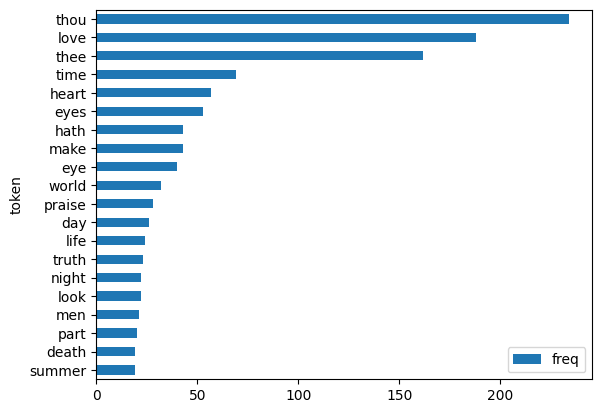

In [11]:
ax = token_df[nouns_condition].head(20).plot(kind="barh", x='token')
ax.invert_yaxis()

In [12]:
# 동사만 뽑아보자
vb_list = ["VB", "VBD", "VBG", "VBN", "VBZ"]
vb_condition = token_df["pos"].map(lambda x: x in vb_list)

token_df[vb_condition]

,token,freq,pos
9,doth,88,VB
16,sweet,55,VB
38,upon,29,VB
46,let,26,VB
52,show,23,VB
...,...,...,...
3031,lying,1,VBG
3034,vowed,1,VBD
3036,tripping,1,VBG
3044,hied,1,VBN


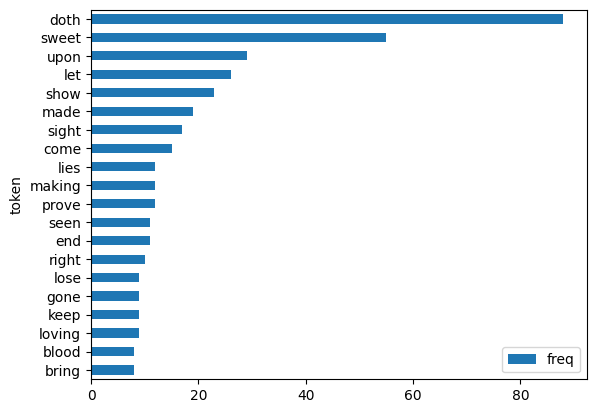

In [ ]:
ax = token_df[vb_condition].head(20).plot(kind="barh", x='token')
ax.invert_yaxis()

In [ ]:
token_cnt = dict(Counter(token_df[nouns_condition]["token"].tolist()))
token_cnt

{'thou': 1,
 'love': 1,
 'thee': 1,
 'time': 1,
 'heart': 1,
 'eyes': 1,
 'hath': 1,
 'make': 1,
 'eye': 1,
 'world': 1,
 'praise': 1,
 'day': 1,
 'life': 1,
 'truth': 1,
 'night': 1,
 'look': 1,
 'men': 1,
 'part': 1,
 'death': 1,
 'summer': 1,
 'nothing': 1,
 'face': 1,
 'thought': 1,
 'hand': 1,
 'thoughts': 1,
 'name': 1,
 'days': 1,
 'mind': 1,
 'hate': 1,
 'age': 1,
 'hast': 1,
 'muse': 1,
 'friend': 1,
 'youth': 1,
 'tell': 1,
 'verse': 1,
 'others': 1,
 'things': 1,
 'state': 1,
 'use': 1,
 'none': 1,
 'ill': 1,
 'looks': 1,
 'hold': 1,
 'die': 1,
 'change': 1,
 'soul': 1,
 'mayst': 1,
 'sun': 1,
 'tongue': 1,
 'woe': 1,
 'hours': 1,
 'thing': 1,
 'bear': 1,
 'desire': 1,
 'knows': 1,
 'kind': 1,
 'shalt': 1,
 'form': 1,
 'grace': 1,
 'pride': 1,
 'pleasure': 1,
 'call': 1,
 'spirit': 1,
 'words': 1,
 'shame': 1,
 'deeds': 1,
 'place': 1,
 'glass': 1,
 'store': 1,
 'lives': 1,
 'treasure': 1,
 'power': 1,
 'decay': 1,
 'times': 1,
 'mistress': 1,
 'th': 1,
 'thence': 1,
 'loss'